In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

In [2]:
# read the data 
advertising = pd.read_csv("advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# first 3 columns are the predictor variables and the fourth column is the target variable
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


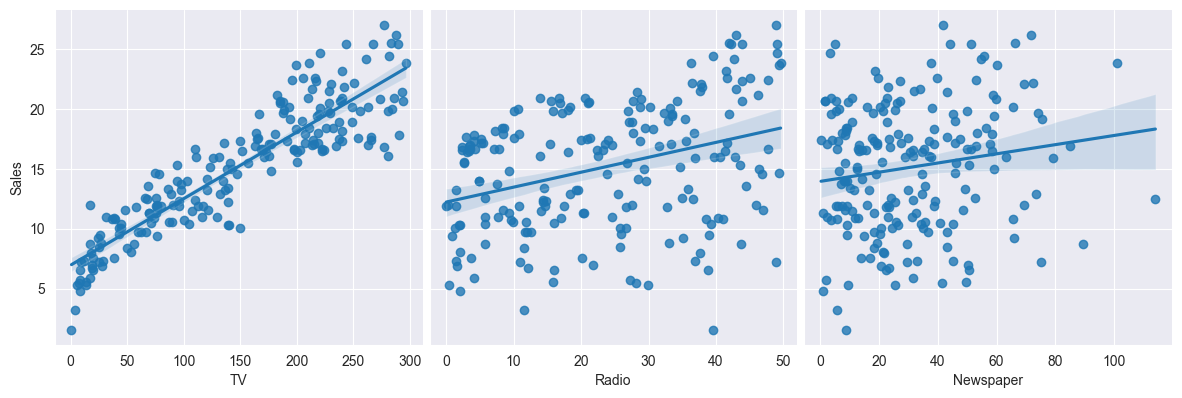

In [6]:
sns.pairplot(data=advertising, kind="reg", x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", aspect=1, size=4)
plt.show()

In [7]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

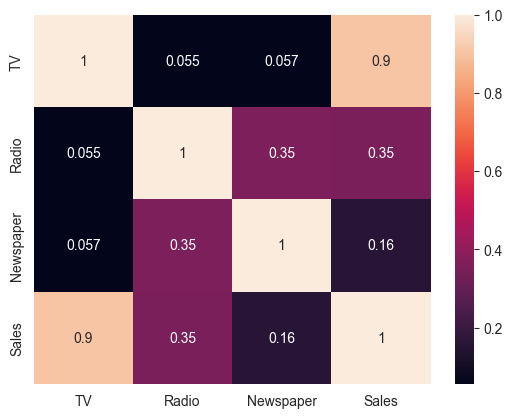

In [8]:
sns.heatmap(data=advertising.corr(), annot=True)

# Let's build a model on "TV" as the Predictor variable

#### Create X and Y

In [9]:
X = advertising["TV"]
y = advertising["Sales"]

#### Do a Train-Test Split(70-30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

## Training the model

In [11]:
X_train_sm = sm.add_constant(X_train)

In [12]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


#### Fitting the model

In [13]:
lr = sm.OLS(y_train, X_train_sm) # Ordinary least squares(OLS)

In [14]:
lr_model = lr.fit()

In [15]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

# Sales = 6.948 + 0.05*TV

In [16]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        13:34:53   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

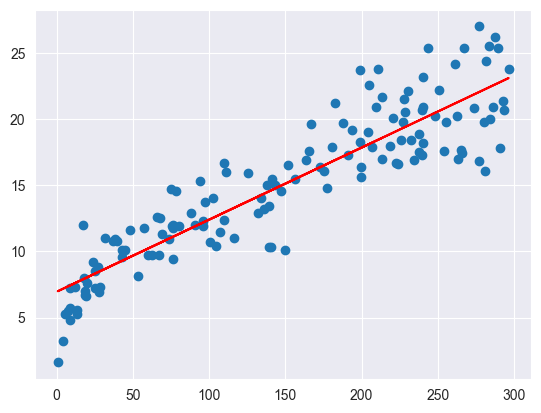

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.0545*X_train, "r")
plt.show()

## Step 3) Residual Analysis
We are doing this anaysis on the training set

In [18]:
# y_train, y_train_predicted
# error = y_train - y_train_predicted
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [19]:
res = y_train - y_train_pred

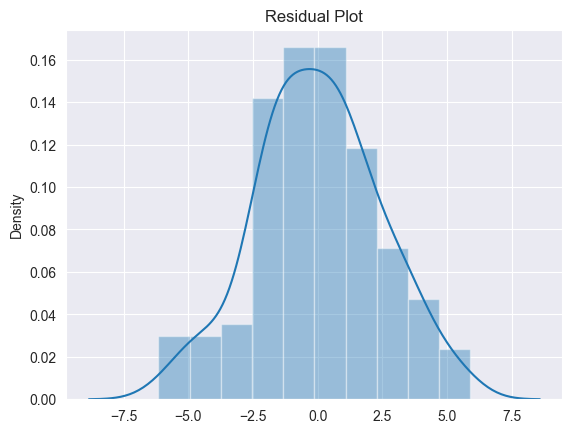

In [20]:
# Plotting the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

### Look for patterns in residuals and we should not be able to identify any patterns

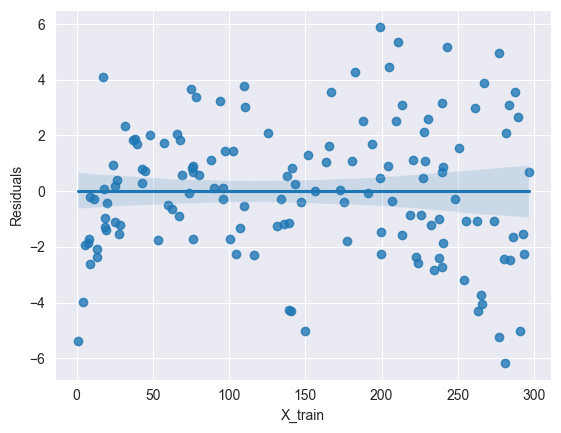

In [21]:
sns.regplot(x=X_train, y=res)
plt.xlabel("X_train")
plt.ylabel("Residuals")
plt.show()

# Step 4) Predictions and evaluations on the test set

In [22]:
# adding a constant to the set as well
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [23]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [24]:
# Now evaluating the model
# r-squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [25]:
# r2 on train set
r2_t = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_t

0.8157933136480389

In [26]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

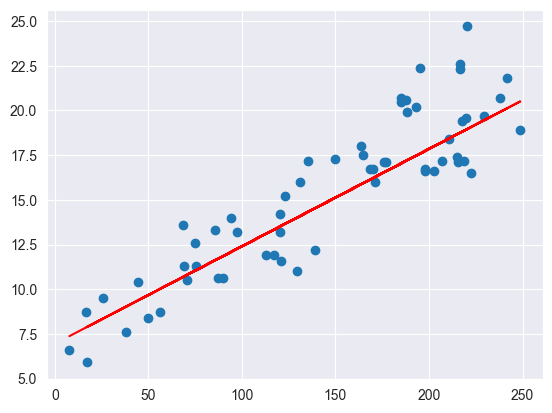

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487 + 0.0545*X_test, "r")
plt.show()

# Linear Regression Using Sklearn Model

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [29]:
X_train.shape

(140,)

In [30]:
# Reshaping to (140, 1)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [31]:
X_train_lm.shape

(140, 1)

In [32]:
X_test_lm.shape

(60, 1)

In [33]:
# steps in sklearn model building
# 1) Create and object if linearregression()
lm = LinearRegression()
# 2) Fit the models
print(lm.fit(X_train_lm, y_train))

LinearRegression()


In [34]:
# 3) See the params, make predictions (train, test)
print(lm.coef_)
print(lm.intercept_)
# 4) Evaluate the model

[0.05454575]
6.948683200001362


#### Making predictions on test and training set

In [35]:
y_train_pred = lm.predict(X_train_lm)

In [36]:
y_test_pred = lm.predict(X_test_lm)

In [39]:
y_test_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [37]:
# Evaluate the model
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [38]:
r2_t = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_t

0.8157933136480388